In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as pxg
import matplotlib.pyplot as plt

In [2]:
df_tweeta=pd.read_csv("/content/claimant-count-by-age-and-sex.csv",delimiter=';')
df_tweeta.head()

,DATE,Location,GEOGRAPHY_CODE,Gender,Age Group,Claimant Count,Claimant Rate (% of population),partlookup,lookup,Population,partdem,demographic_category
0,2018-03-01,England,E92000001,Male,Aged 55-59,40320,2.156536,EnglandMale,EnglandMaleAged 55-59,1869665,England Male,England Male Aged 55-59
1,2018-03-01,England,E92000001,Male,Aged 60-64,30370,1.895801,EnglandMale,EnglandMaleAged 60-64,1601961,England Male,England Male Aged 60-64
2,2018-04-01,Leicester,E06000016,Total,Aged 30-34,515,1.872863,LeicesterTotal,LeicesterTotalAged 30-34,27498,Leicester Total,Leicester Total Aged 30-34
3,2018-04-01,Leicester,E06000016,Total,Aged 35-39,480,1.761597,LeicesterTotal,LeicesterTotalAged 35-39,27248,Leicester Total,Leicester Total Aged 35-39
4,2018-04-01,Leicester,E06000016,Total,Aged 40-44,430,1.741666,LeicesterTotal,LeicesterTotalAged 40-44,24689,Leicester Total,Leicester Total Aged 40-44


adding location filters

In [3]:
df_tweeta.Location.value_counts()

England      2673
Leicester    2673
Name: Location, dtype: int64

In [4]:
# df_tweet=df_tweeta[df_tweeta['Location']=='Leicester']
df_tweet=df_tweeta.copy() # choose this if you want both england and leicester

# Date filter

In [5]:
df_tweet['year'] = pd.DatetimeIndex(df_tweet['DATE']).year
df_tweet['Month'] = pd.DatetimeIndex(df_tweet['DATE']).month

In [6]:
df_tweet.sample(10)

,DATE,Location,GEOGRAPHY_CODE,Gender,Age Group,Claimant Count,Claimant Rate (% of population),partlookup,lookup,Population,partdem,demographic_category,year,Month
5007,2021-11-01,Leicester,E06000016,Female,Aged 55-59,455,4.636234,LeicesterFemale,LeicesterFemaleAged 55-59,9814,Leicester Female,Leicester Female Aged 55-59,2021,11
5295,2022-11-01,England,E92000001,Female,Aged 45-49,51840,2.839700,EnglandFemale,EnglandFemaleAged 45-49,1825545,England Female,England Female Aged 45-49,2022,11
1578,2019-03-01,Leicester,E06000016,Male,Aged 30-34,495,3.735003,LeicesterMale,LeicesterMaleAged 30-34,13253,Leicester Male,Leicester Male Aged 30-34,2019,3
1293,2021-12-01,Leicester,E06000016,Male,Aged 50-54,575,5.265086,LeicesterMale,LeicesterMaleAged 50-54,10921,Leicester Male,Leicester Male Aged 50-54,2021,12
4284,2017-11-01,England,E92000001,Total,Aged 50-54,67085,1.716715,EnglandTotal,EnglandTotalAged 50-54,3907754,England Total,England Total Aged 50-54,2017,11
4859,2021-04-01,Leicester,E06000016,Female,Aged 50-54,635,5.787459,LeicesterFemale,LeicesterFemaleAged 50-54,10972,Leicester Female,Leicester Female Aged 50-54,2021,4
1663,2019-06-01,England,E92000001,Total,Aged 25-29,123760,3.331106,EnglandTotal,EnglandTotalAged 25-29,3715283,England Total,England Total Aged 25-29,2019,6
3831,2018-11-01,Leicester,E06000016,Total,Aged 35-39,550,2.018497,LeicesterTotal,LeicesterTotalAged 35-39,27248,Leicester Total,Leicester Total Aged 35-39,2018,11
5339,2023-01-01,England,E92000001,Male,Aged 65+,12880,0.270548,EnglandMale,EnglandMaleAged 65+,4760712,England Male,England Male Aged 65+,2023,1
470,2019-09-01,England,E92000001,Male,Aged 40-44,50345,2.870809,EnglandMale,EnglandMaleAged 40-44,1753687,England Male,England Male Aged 40-44,2019,9


In [7]:
month_map = {1:'January',
             2:'February',
             3:'March',
             4:'April',
             5:'May',
             6:'June',
             7:'July',
             8:'August',
             9:'September',
             10:'October',
             11:'November',
             12:'December'
             }

In [8]:
df_tweet['Month_Name']=df_tweet['Month'].apply(lambda v: month_map[v])

In [9]:
df_tweet.sample(6)

,DATE,Location,GEOGRAPHY_CODE,Gender,Age Group,Claimant Count,Claimant Rate (% of population),partlookup,lookup,Population,partdem,demographic_category,year,Month,Month_Name
5245,2022-09-01,England,E92000001,Male,Aged 45-49,63785,3.589275,EnglandMale,EnglandMaleAged 45-49,1777100,England Male,England Male Aged 45-49,2022,9,September
1468,2018-10-01,Leicester,E06000016,Male,Aged 60-64,190,2.195263,LeicesterMale,LeicesterMaleAged 60-64,8655,Leicester Male,Leicester Male Aged 60-64,2018,10,October
4785,2020-12-01,England,E92000001,Female,Aged 55-59,72975,3.768000,EnglandFemale,EnglandFemaleAged 55-59,1936704,England Female,England Female Aged 55-59,2020,12,December
2954,2020-04-01,England,E92000001,Total,Aged 65+,14060,0.135175,EnglandTotal,EnglandTotalAged 65+,10401307,England Total,England Total Aged 65+,2020,4,April
1885,2022-12-01,Leicester,E06000016,Male,Aged 55-59,420,4.347376,LeicesterMale,LeicesterMaleAged 55-59,9661,Leicester Male,Leicester Male Aged 55-59,2022,12,December
3124,2022-02-01,Leicester,E06000016,Female,Aged 25-29,630,4.568197,LeicesterFemale,LeicesterFemaleAged 25-29,13791,Leicester Female,Leicester Female Aged 25-29,2022,2,February


In [10]:
df_tweet['year'].value_counts()

2018    792
2019    792
2020    792
2017    792
2021    792
2022    792
2016    528
2023     66
Name: year, dtype: int64

In [11]:
type(df_tweet['year'])

pandas.core.series.Series

## choose month and year

In [12]:
monthss=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [13]:
staring_month_number=1
ending_month_number=12

In [14]:
Months_wanted=[monthss[i] for i in range(staring_month_number-1,ending_month_number)]# months_range.apply(lambda v: month_map[v])#['January','July']
years_wanted=[]#[2010,2018,2019]

In [15]:
if len(Months_wanted)==0:
  X1=df_tweet.copy()
else:
  X1=df_tweet.loc[df_tweet['Month_Name'].isin(Months_wanted)]

In [16]:
if len(years_wanted)==0:
  X2=X1.copy()
else:
  X2=X1.loc[X1['year'].isin(years_wanted)]

In [17]:
# X1=df_tweet.loc[df_tweet['Month_Name'].isin(Months_wanted)]
# X2=X1.loc[X1['year'].isin(years_wanted)]

In [18]:
X2.head()

,DATE,Location,GEOGRAPHY_CODE,Gender,Age Group,Claimant Count,Claimant Rate (% of population),partlookup,lookup,Population,partdem,demographic_category,year,Month,Month_Name
0,2018-03-01,England,E92000001,Male,Aged 55-59,40320,2.156536,EnglandMale,EnglandMaleAged 55-59,1869665,England Male,England Male Aged 55-59,2018,3,March
1,2018-03-01,England,E92000001,Male,Aged 60-64,30370,1.895801,EnglandMale,EnglandMaleAged 60-64,1601961,England Male,England Male Aged 60-64,2018,3,March
2,2018-04-01,Leicester,E06000016,Total,Aged 30-34,515,1.872863,LeicesterTotal,LeicesterTotalAged 30-34,27498,Leicester Total,Leicester Total Aged 30-34,2018,4,April
3,2018-04-01,Leicester,E06000016,Total,Aged 35-39,480,1.761597,LeicesterTotal,LeicesterTotalAged 35-39,27248,Leicester Total,Leicester Total Aged 35-39,2018,4,April
4,2018-04-01,Leicester,E06000016,Total,Aged 40-44,430,1.741666,LeicesterTotal,LeicesterTotalAged 40-44,24689,Leicester Total,Leicester Total Aged 40-44,2018,4,April


In [19]:
df_1=X2.copy()

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5346 entries, 0 to 5345
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DATE                             5346 non-null   object 
 1   Location                         5346 non-null   object 
 2   GEOGRAPHY_CODE                   5346 non-null   object 
 3   Gender                           5346 non-null   object 
 4   Age Group                        5346 non-null   object 
 5   Claimant Count                   5346 non-null   int64  
 6   Claimant Rate (% of population)  5346 non-null   float64
 7   partlookup                       5346 non-null   object 
 8   lookup                           5346 non-null   object 
 9   Population                       5346 non-null   int64  
 10  partdem                          5346 non-null   object 
 11  demographic_category             5346 non-null   object 
 12  year                

In [21]:
# fig = px.scatter(df_1.iloc[:,5], df_1.iloc[:,6])
fig=px.scatter(df_1,x='Claimant Count',y='Claimant Rate (% of population)',title="claimant count vs claimant rate (%)")
# fig.title('claimant count vs claimant rate (%)')
fig.show()

In [22]:
fig = px.scatter(df_1, x="Age Group", y="Claimant Count", color='Gender')
fig.show()

In [23]:
fig = px.histogram(df_1, x="Claimant Count", y="Age Group", color='Location')
fig.show()

In [24]:
plot = pxg.Figure(data=[pxg.Scatter(
	x=df_1['Claimant Count'],
	y=df_1['Age Group'],
	mode='markers',)
  # color='Location',)
])

# Add dropdown
plot.update_layout(
	updatemenus=[
		dict(
			type="buttons",
			direction="left",
			buttons=list([
				dict(
					args=["type", "scatter"],
					label="Scatter Plot",
					method="restyle"
				),
				dict(
					args=["type", "histogram"],
					label="Histogram",
					method="restyle"
				)
			]),
		),
	]
)

plot.show()


In [25]:
# df_1 = px.df_1.tips()
y=df_1['Claimant Rate (% of population)']#Claimant Count'],#Claimant Rate (% of population)
x=df_1['Population']#DATE'],
 
plot = pxg.Figure(data=[pxg.Scatter(
    x=x,
    y=y,
    mode='markers',)
])
 
plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    step="day",
                    stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
 
plot.show()

(array([1782.,    0.,    0.,    0.,    0., 1782.,    0.,    0.,    0.,
        1782.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

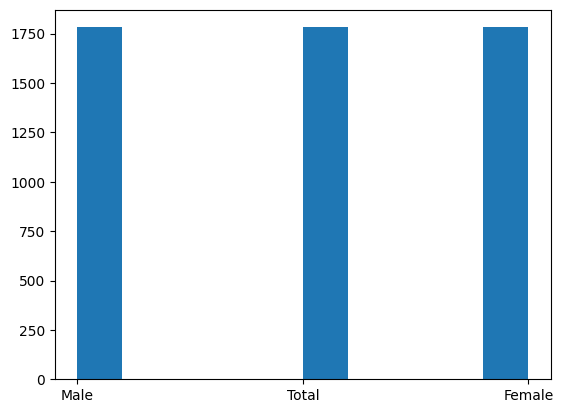

In [26]:
plt.hist(df_1['Gender'])

(array([486., 486., 486., 486., 486., 486., 486., 486., 486., 972.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

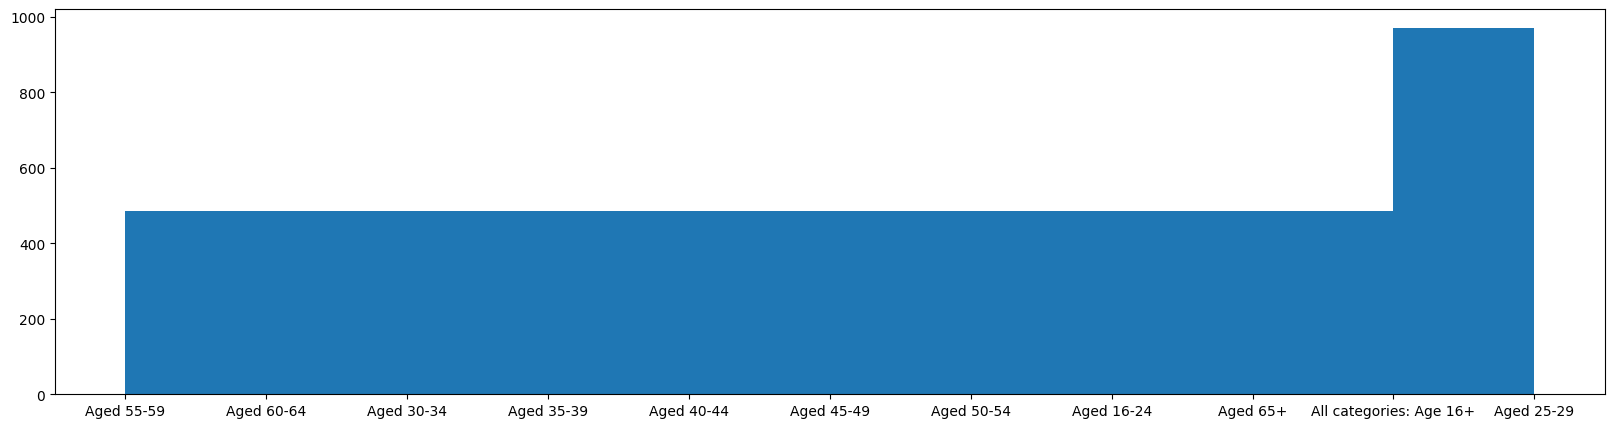

In [27]:
plt.figure(figsize=(20,5))
plt.hist(df_1['Age Group'])